In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from config.project_config import get_data_path
from src.SolverAnalyses import ConvergenceAnalysis
from src.DataFrameAnalyses import DataFramePlotGenerator

In [3]:
experiment_id = 2
shift = 5

sub_directory = "2025_10_16_Bernard"
if experiment_id == 1:
    max_utilization = 1
elif experiment_id == 2:
    max_utilization = 0.9

experiments_file_path = get_data_path(
    sub_directory,
    f"experiments_{max_utilization:.2f}".replace(".", "_")
)

def get_experiment_string(df, experiment_id, shift_numb: int):
    row = df[df["Experiment_ID"] == experiment_id].iloc[0]
    return (
        f"Shift {shift_numb}\n"
        f"lateness/deviation = {row['Abs Lateness Ratio']:.2f}, "
        f"tardiness/earliness = {row['Inner Tardiness Ratio']:.2f}, "
        f"bottleneck utilization = {row['Max Bottleneck Utilization']:.2f} "
        f"(sigma = {row['Sim Sigma']:.2f})"
    )

df_experiments = pd.read_csv(f"{experiments_file_path}.csv")
df_experiments

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\konra\\Coding\\HTWD_Minimalinvasives_Job-Shop_Scheduling\\data\\2025_10_16_Bernard\\experiments_0_90.csv'

In [15]:
import os

sub_directory = "2025_10_16_Bernard/logs"
path = get_data_path(
    sub_directory
)
path

ordner = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
ordner



['Experiment_001',
 'Experiment_002',
 'Experiment_003',
 'Experiment_004',
 'Experiment_005',
 'Experiment_006',
 'Experiment_007',
 'Experiment_008',
 'Experiment_009',
 'Experiment_010',
 'Experiment_011',
 'Experiment_012',
 'Experiment_013',
 'Experiment_014',
 'Experiment_015',
 'Experiment_016',
 'Experiment_017',
 'Experiment_018',
 'Experiment_019',
 'Experiment_020',
 'Experiment_021',
 'Experiment_022',
 'Experiment_023',
 'Experiment_024',
 'Experiment_025',
 'Experiment_026',
 'Experiment_027',
 'Experiment_028',
 'Experiment_029',
 'Experiment_030',
 'Experiment_031',
 'Experiment_032',
 'Experiment_033',
 'Experiment_034',
 'Experiment_035',
 'Experiment_036',
 'Experiment_037',
 'Experiment_038',
 'Experiment_039',
 'Experiment_040',
 'Experiment_041',
 'Experiment_042',
 'Experiment_043',
 'Experiment_044',
 'Experiment_045',
 'Experiment_046',
 'Experiment_047',
 'Experiment_048',
 'Experiment_049',
 'Experiment_050',
 'Experiment_051',
 'Experiment_052',
 'Experiment

In [12]:
dateien = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]


WindowsPath('C:/Users/konra/Coding/HTWD_Minimalinvasives_Job-Shop_Scheduling/data/2025_10_16_Bernard/logs')

In [13]:
dateien

[]

In [24]:
import os

results = []  # sammelt (experiment_ordner, sum_max_time)

ordner = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
for experiment_ordner in ordner:
    ordnerpfad = os.path.join(path, experiment_ordner)

    # Nur Dateien in diesem Unterordner
    dateien = [
        f for f in os.listdir(ordnerpfad)
        if os.path.isfile(os.path.join(ordnerpfad, f))
    ]

    sum_max_time = 0.0

    for datei in dateien:
        logpfad = os.path.join(ordnerpfad, datei)
        try:
            df_cp_logs = ConvergenceAnalysis.parse_cp_sat_bound_log_to_dataframe(
                file_path=logpfad
            )
        except Exception as e:
            # Parser-Fehler o.ä. — optional protokollieren und überspringen
            # print(f"Warnung: {logpfad}: {e}")
            continue

        # Leere Logs oder fehlende Spalte "Time" überspringen
        if df_cp_logs is None or df_cp_logs.empty or "Time" not in df_cp_logs.columns:
            continue

        # Zeitspalte sicher numerisch (nicht-numerische Werte werden NaN -> ignoriert)
        # Dann Maximum ziehen, wenn vorhanden
        max_time = (
            df_cp_logs["Time"]
            .apply(pd.to_numeric, errors="coerce")
            .dropna()
            .max()
        )

        if pd.notna(max_time):
            sum_max_time += float(max_time)

    results.append((experiment_ordner, sum_max_time))

# Ausgabe sortiert (absteigend nach Summe)
results.sort(key=lambda x: x[1], reverse=True)

print("Summen der maximalen 'Time' je Log, gruppiert pro Experiment:")
for exp, total_time in results:
    print(f"{exp}: {total_time:.3f}")


Summen der maximalen 'Time' je Log, gruppiert pro Experiment:
Experiment_046: 18693.940
Experiment_044: 13722.360
Experiment_049: 13612.180
Experiment_041: 13555.040
Experiment_052: 13219.020
Experiment_042: 12737.540
Experiment_043: 12699.190
Experiment_047: 12672.210
Experiment_053: 12445.380
Experiment_051: 12420.670
Experiment_054: 11715.910
Experiment_048: 11044.850
Experiment_045: 10760.120
Experiment_055: 8908.740
Experiment_059: 8654.860
Experiment_050: 8456.150
Experiment_031: 8297.250
Experiment_058: 7541.340
Experiment_028: 7301.230
Experiment_021: 6677.160
Experiment_025: 6216.940
Experiment_024: 5532.080
Experiment_033: 5382.170
Experiment_008: 5149.080
Experiment_034: 5126.700
Experiment_032: 5083.500
Experiment_026: 4968.350
Experiment_027: 4882.400
Experiment_057: 4527.740
Experiment_029: 4509.960
Experiment_014: 3963.870
Experiment_001: 3673.470
Experiment_005: 3597.690
Experiment_022: 3227.440
Experiment_030: 3157.710
Experiment_006: 3065.760
Experiment_035: 2742.750


In [27]:
df_results = pd.DataFrame(results, columns=["Experiment", "TotalMaxTime"])

worst_row = df_results.loc[df_results["TotalMaxTime"].idxmax()]
print("Experiment mit der längsten Gesamtzeit:")
print(worst_row)


Experiment mit der längsten Gesamtzeit:
Experiment      Experiment_046
TotalMaxTime          18693.94
Name: 0, dtype: object


In [28]:
df_results = pd.DataFrame(results, columns=["Experiment", "TotalMaxTime"])

best_row = df_results.loc[df_results["TotalMaxTime"].idxmin()]
print("Experiment mit der kürzesten Gesamtzeit:")
print(best_row)


Experiment mit der kürzesten Gesamtzeit:
Experiment      Experiment_020
TotalMaxTime               0.0
Name: 57, dtype: object


In [4]:
log_file = f"Shift_{shift:02d}.log"
logs_file_path= get_data_path(sub_directory=sub_directory, file_name=f"logs/Experiment_{experiment_id:03d}/" + log_file)


df_cp_logs = ConvergenceAnalysis.parse_cp_sat_bound_log_to_dataframe(
    file_path=logs_file_path,

)

mask = df_cp_logs["BestSol"].ne(df_cp_logs["BestSol"].shift())  # True, wenn Änderung
df_cp = df_cp_logs[mask | (df_cp_logs.index == df_cp_logs.index[-1])].reset_index(
    drop=True)  # letzen Wert behalten, auch wenn keine Verbesserung


df_cp["ImprovementPct"] = (
    -df_cp["BestSol"].pct_change() * 100
).round(4).fillna(0)

# -0.0 zu 0 machen
df_cp["ImprovementPct"] = df_cp["ImprovementPct"].replace(-0.0, 0.0)

df_cp["Duration"] = df_cp["Time"].diff().fillna(0).round(4)
df_cp

,Time,BestSol,ImprovementPct,Duration
0,0.03,62145.0,0.0000,0.00
1,0.04,52228.0,15.9578,0.01
2,0.38,3034.0,94.1909,0.34


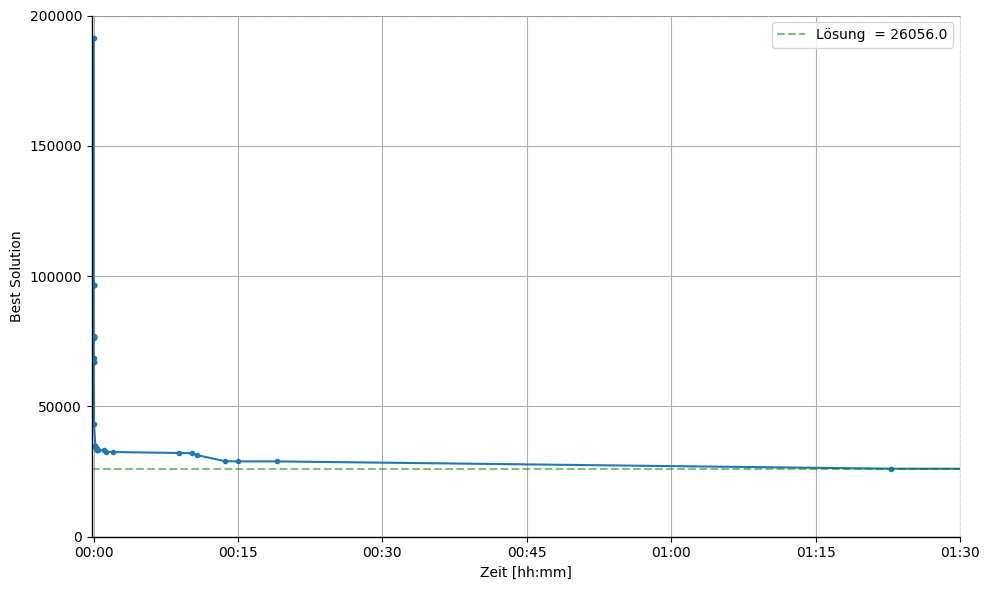

In [43]:
#from src.DataPreprocessing import SimulationDataVisualization
#SimulationDataVisualization.set_latex_style(mono=False)

fig = DataFramePlotGenerator.get_convergence_plot_figure(
    df_cp, time_col="Time", bestsol_col="BestSol",
    granularity="quarter", # title=f"{get_experiment_string(df_experiments, experiment_id, shift)}",
   x_max=60*60*1.5
)
best_val = df_cp["BestSol"].min()

ax = fig.axes[0]
ax.axhline(y=best_val, color="green", linestyle="--", alpha=0.5, label=f"Lösung  = {best_val}")
ax.legend()

file_path = get_data_path("output", f"Konvergenzanalyse_util{max_utilization:.2f}_shift{shift:02d}", as_string=True)
fig.savefig(file_path +".pdf", format="pdf", bbox_inches="tight")
fig.savefig(file_path +".png", format="png", bbox_inches="tight")

plt.show()

In [40]:
print(f"{get_experiment_string(df_experiments, experiment_id, shift)}")

Shift 5
lateness/deviation = 0.50, tardiness/earliness = 0.50, bottleneck utilization = 0.90 (sigma = 0.25)
